In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, RandomForestRegressor
import warnings
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
warnings.simplefilter('ignore')


In [3]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
ohe_encoding = OneHotEncoder(drop="first", sparse_output=False)
encoded_cols = ["Gender", "Country", "Ethnicity"]
df_ohe_encoding = pd.DataFrame(ohe_encoding.fit_transform(df[encoded_cols]), columns=ohe_encoding.get_feature_names_out(encoded_cols))

In [5]:
ord_encoding = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Thyroid_Cancer_Risk'] = ord_encoding.fit_transform(df[['Thyroid_Cancer_Risk']])

df = df.drop(columns=encoded_cols).join(df_ohe_encoding)

df['Diagnosis'] = df['Diagnosis'].map({'Benign' : 0, 'Malignant' : 1})

In [6]:
binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']
df[binary_cols] = df[binary_cols].replace({'Yes' : 1, 'No' : 0}).astype(int)

In [7]:
df

,Patient_ID,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,0,1,0,0,0,0,9.37,1.67,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,29,0,1,0,0,0,0,1.83,1.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,86,0,0,0,0,0,0,6.26,2.59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,75,0,0,0,0,0,0,4.10,2.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,35,1,1,0,0,0,0,9.10,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,0,0,0,0,1,0,2.00,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,212688,89,0,0,0,0,1,0,9.77,3.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,212689,72,0,0,0,0,0,1,7.72,2.44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,212690,85,0,0,0,0,0,1,5.62,2.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train test & split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_resultats = pd.DataFrame()


X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

score = cross_val_score(model, X, y, cv=5)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')

df_resultats['val_score'] = score

Score des validations croisées [0.80671854 0.81282618 0.81367248 0.79293808 0.78607363]
Score moyen : 0.8024457815668784


In [ ]:
clf = GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'max_iter' :[100,200,500] },scoring='roc_auc', verbose=1)

clf.fit(X_train, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres : {'max_iter': 500}
Meilleur score AUC : 0.69675165929871
Meilleur index : 2
Meilleur estimateur : LogisticRegression(max_iter=500)


Accuracy : 0.8189744831811252
AUC : 0.6723953746893074


Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     53887
           1       0.69      0.40      0.51     16302

    accuracy                           0.82     70189
   macro avg       0.76      0.67      0.70     70189
weighted avg       0.80      0.82      0.80     70189

Matrice de confusion


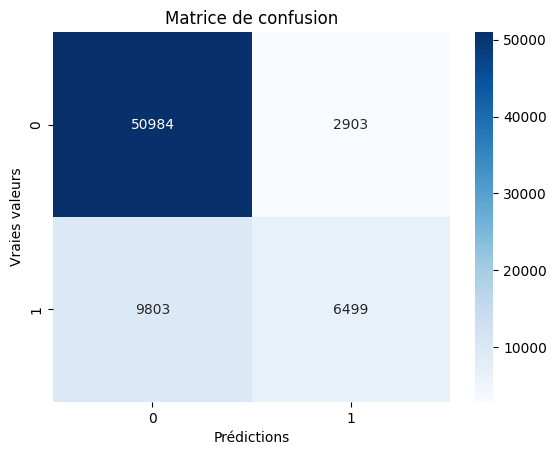

In [ ]:
best_lr_model = clf.best_estimator_
y_pred = best_lr_model.predict(X_test)


print(f'Accuracy : {accuracy_score(y_test, y_pred)}')

print(f'AUC : {roc_auc_score(y_test, y_pred)}')

print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')

print(f'Matrice de confusion')

confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()
# print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

df_resultats['polynomial_features'] = cross_val_score(model, X_train_poly, y_train, cv=5)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')
df_resultats['polynomial_features'] = score

Score des validations croisées [0.80671854 0.81282618 0.81367248 0.79293808 0.78607363]
Score moyen : 0.8024457815668784


In [32]:
clf = GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'max_iter' :[100,200,500] },scoring='roc_auc', verbose=1)
clf.fit(X_train_poly, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres : {'max_iter': 500}
Meilleur score AUC : 0.6842975405894827
Meilleur estimateur : LogisticRegression(max_iter=500)


Accuracy : 0.7912065993246805
AUC : 0.5845719870274664


Classification report : 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     53887
           1       0.67      0.20      0.31     16302

    accuracy                           0.79     70189
   macro avg       0.74      0.58      0.59     70189
weighted avg       0.77      0.79      0.74     70189

Matrice de confusion


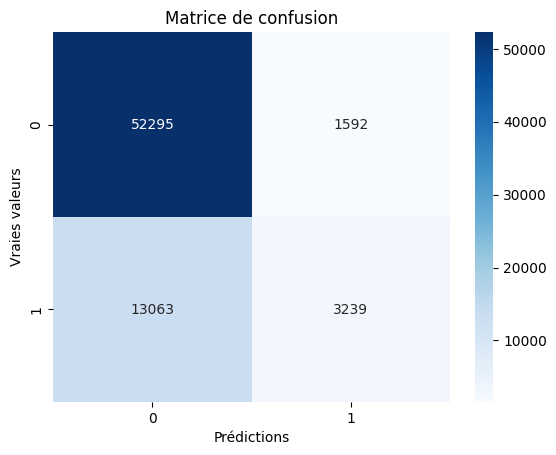

Matrice de confusion : 
[[52295  1592]
 [13063  3239]]


In [35]:
model = clf.best_estimator_

X_test_poly = poly.transform(X_test)

y_pred = model.predict(X_test_poly)

print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'AUC : {roc_auc_score(y_test, y_pred)}')
print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')

print(f'Matrice de confusion')
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

## Random Forest regression

## KNN

## Decision Tree